In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
import string
nltk.download('stopwords')
stopword = set(["your", "stop", "words"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\niyat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv("C:/Users/niyat/Desktop/pre-processed.csv")
df.head()

,tweets,ClassLabel
0,a a woman you shouldnt complain about cleaning...,2
1,rtboydatscoldtygadwnbad for cuffindathoeinthe1...,1
2,dawg you ever fuck a bitch and she start to cr...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24781 entries, 0 to 24780
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweets      24781 non-null  object
 1   ClassLabel  24781 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.3+ KB


In [8]:
print(df['tweets'].iloc[0],"\n")
print(df['tweets'].iloc[1],"\n")
print(df['tweets'].iloc[2],"\n")
print(df['tweets'].iloc[3],"\n")
print(df['tweets'].iloc[4],"\n")

a a woman you shouldnt complain about cleaning up your house a a man you should always take the trash out 

rtboydatscoldtygadwnbad for cuffindathoeinthe1st place 

dawg you ever fuck a bitch and she start to cry you be confused a shit 

she look like a tranny 

the shit you hear about me might be true or it might be faker than the bitch who told it to ya 



In [9]:
df['labels'] = df['ClassLabel'].map({1:"Hate speech detected" , 0:"Offensive language detected", 2:"No hate and offensive speech"})
print(df.head())

                                              tweets  ClassLabel  \
0  a a woman you shouldnt complain about cleaning...           2   
1  rtboydatscoldtygadwnbad for cuffindathoeinthe1...           1   
2  dawg you ever fuck a bitch and she start to cr...           1   
3                             she look like a tranny           1   
4  the shit you hear about me might be true or it...           1   

                         labels  
0  No hate and offensive speech  
1          Hate speech detected  
2          Hate speech detected  
3          Hate speech detected  
4          Hate speech detected  


In [10]:
df = df[['tweets' , 'labels']]
df.head()

,tweets,labels
0,a a woman you shouldnt complain about cleaning...,No hate and offensive speech
1,rtboydatscoldtygadwnbad for cuffindathoeinthe1...,Hate speech detected
2,dawg you ever fuck a bitch and she start to cr...,Hate speech detected
3,she look like a tranny,Hate speech detected
4,the shit you hear about me might be true or it...,Hate speech detected


In [12]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\. \S+', '', text)
    text = re.sub('<.*?>+' ,'',text)
    text = re.sub('%', '', text)
    text = re.sub('\n', '',text)
    text = re.sub('\w*\d\w*' , '',text)
    text = re.sub('!+', '!', text)
    text = re.sub('@', '', text)
    text = re.sub(':', '', text)
    text = re.sub('_', '', text)
    text = re.sub('#', '', text)

    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    return text
df["tweets"] = df["tweets"].apply(clean)
print(df.head())

                                              tweets  \
0  a a woman you shouldnt complain about cleaning...   
1                 rtboydatscoldtygadwnbad for  place   
2  dawg you ever fuck a bitch and she start to cr...   
3                             she look like a tranny   
4  the shit you hear about me might be true or it...   

                         labels  
0  No hate and offensive speech  
1          Hate speech detected  
2          Hate speech detected  
3          Hate speech detected  
4          Hate speech detected  


C:\Users\niyat\AppData\Local\Temp\ipykernel_18252\2641274677.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweets"] = df["tweets"].apply(clean)


In [13]:
df = df.drop_duplicates('tweets')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24066 entries, 0 to 24780
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  24066 non-null  object
 1   labels  24066 non-null  object
dtypes: object(2)
memory usage: 564.0+ KB


In [15]:
df['labels'].value_counts()

labels
Hate speech detected            18623
No hate and offensive speech     4067
Offensive language detected      1376
Name: count, dtype: int64

<Axes: xlabel='labels', ylabel='count'>

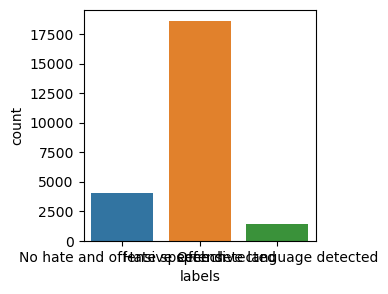

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(3,3))
sns.countplot(x='labels' , data = df)

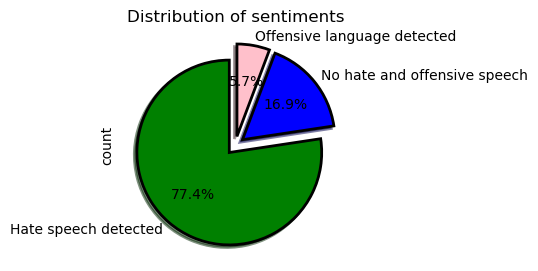

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3, 3))
colors = ("green", "blue","pink")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = df['labels'].value_counts()
explode = tuple([0.1] * len(tags)) 
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)
plt.title('Distribution of sentiments')
plt.show()

In [21]:
df = df.dropna(subset=['tweets', 'labels'])

x = np.array(df["tweets"])
y = np.array(df["labels"])

cv=CountVectorizer()
x = cv.fit_transform(x)
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= 0.33, random_state= 42)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
test_data="bitch"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))


['Hate speech detected']


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)  # Increase max_iter to a suitable value
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc * 100))

Test accuracy: 88.42%
